# The 3-3-4-3-4 tiling
By which I mean

<img src="33434.png" width=40%>

This tiling is 2-regular according to Grünbaum and Shephard. From a cartographic perspective, it may be of interest, because it has 6 distinct tiles i.e. tiles distinguishable by shape and/orientation that can be separately symbolised. This property is related to the notion of transitivity groups in tilings. 

If the base-to-base triangles are merged then an alternate version with squares and rhombuses is available with 4 distinct tile types.

In [54]:
%matplotlib inline

import matplotlib.pyplot as pyplot

from shapely.geometry import Polygon
from shapely.affinity import rotate
from shapely.affinity import translate
from shapely.affinity import scale

from tile_map import Tiling
from tile_units import TileUnit

import numpy as np
import geopandas as gpd
import copy

ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

## Convenience function for complex list slices

In [55]:
def select_from_list(lst, *t):
    return [lst[i] for i in t]

## The 3<sup>2</sup>4.3.4 tiling
Set up some dimensions for simplicity. Spacing will be the base square tile dimension. s is the edge dimension of the square and h is the height of the equilateral triangle with that edge length.

In [56]:
spacing = 500
s = spacing / (1 + np.sqrt(3))
h = s * np.sqrt(3) / 2

The tile is the same whether we do the rhombus version or the squares and triangles version.

In [57]:
tile = gpd.GeoDataFrame(
    geometry = gpd.GeoSeries([Polygon([
        (-spacing/2, -spacing/2), (spacing/2, -spacing/2), 
        (spacing/2, spacing/2), (-spacing/2, spacing/2)
    ])])
)

Make up the squares and triangles.

In [58]:
# centre on the origin and rotate by 30
square = Polygon([(-s/2, -s/2), (s/2, -s/2), (s/2, s/2), (-s/2, s/2)])
square = rotate(square, 30, origin = (0, 0))
# make 4 triangles one on each side of the square
tri1 = Polygon([(-s/2, -s/2), (-s/2, s/2), (-s/2 - h, 0)])
tri1 = rotate(tri1, 30, origin = (0, 0))
tri2 = rotate(tri1, 90, origin = (0, 0))
tri3 = rotate(tri2, 90, origin = (0, 0))
tri4 = rotate(tri3, 90, origin = (0, 0))
# bundle them into a geoseries for convenient mirroring
base1 = gpd.GeoSeries([
    square, tri1, tri2, tri3, tri4]).translate(-spacing/4, -spacing/4)
base2 = base1.scale(-1, 1, origin = (0, 0))
base3 = base1.scale(-1, -1, origin = (0, 0))
base4 = base1.scale(1, -1, origin = (0, 0))

Assemble into a geodataframe

In [59]:
elements1 = gpd.GeoDataFrame(
    data = {"element_id": list("acdefbghacbe")},
    geometry = gpd.GeoSeries(
        list(base1.geometry) + 
        select_from_list(list(base2.geometry), 0, 2, 4) + 
        select_from_list(list(base3.geometry), 0, 3) + 
        select_from_list(list(base4.geometry), 0, 1)
    ), crs = ak.crs
)

In [60]:
unit1 = TileUnit(spacing = spacing, crs = ak.crs)
unit1.elements = elements1
unit1.tile = tile

<AxesSubplot:>

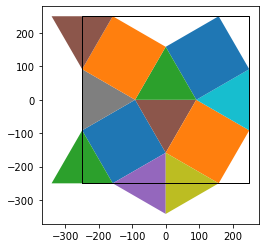

In [61]:
ax = unit1.elements.plot(column = "element_id", linewidth = 0.)
unit1.tile.plot(ax = ax, edgecolor = "k", facecolor = "#00000000")

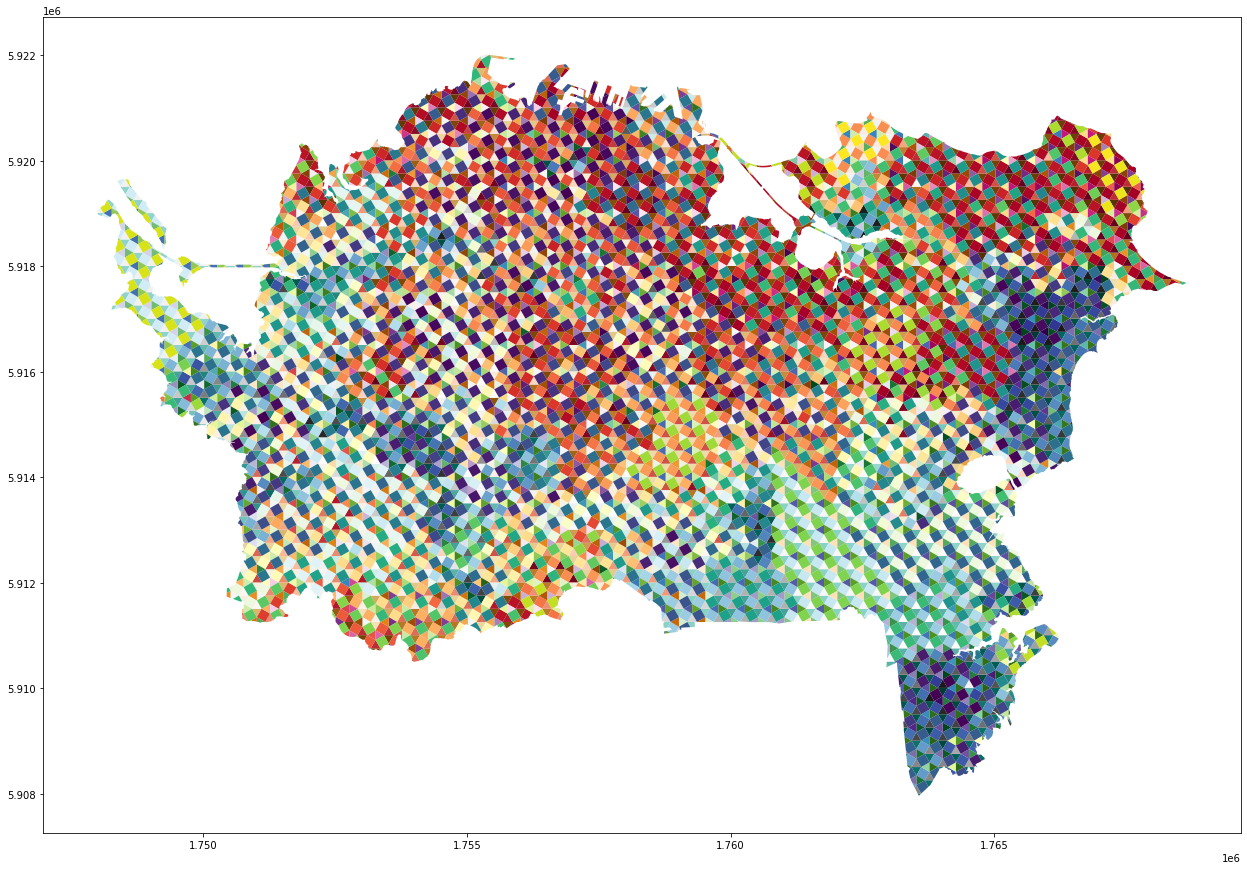

In [62]:
tiling1 = Tiling(unit1, ak, id_var = "DZ2018").get_tiled_map(
    prioritise_tiles = True)

fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)
# ak.plot(ax = ax, facecolor = "#009966", linewidth = 0)

strands = set(tiling1.element_id)
cols = [x for x in tiling1.columns if "Rank" in x]
cmaps = ("BrBG", "RdGy", "RdYlBu", "Spectral",
         "PiYG", "PRGn", "PuOr", "viridis")

for strand, col, cmap in zip(strands, cols, cmaps):
    tiling1[tiling1.element_id == strand].plot(
        ax = ax, column = col, cmap = cmap, k = 100, 
        scheme = "equal_interval", linewidth = 0)

In [64]:
square = Polygon([(-s/2, -s/2), (s/2, -s/2), (s/2, s/2), (-s/2, s/2)])
square = rotate(square, 30, origin = (0, 0))
rhomb1 = Polygon([(-s/2, -s/2), (-s/2, s/2), (-s/2 - h, 0), (-s/2 - h, -s)])
rhomb1 = rotate(rhomb1, 30, origin = (0, 0))
rhomb2 = rotate(rhomb1, 90, origin = (0, 0))
rhomb3 = rotate(rhomb2, 90, origin = (0, 0))
rhomb4 = rotate(rhomb3, 90, origin = (0, 0))
base1 = gpd.GeoSeries([
    square, rhomb1, rhomb2, rhomb3, rhomb4]).translate(-spacing/4, -spacing/4)
base2 = base1.scale(-1, 1, origin = (0, 0))
base3 = base1.scale(-1, -1, origin = (0, 0))
base4 = base1.scale(1, -1, origin = (0, 0))

In [65]:
elements2 = gpd.GeoDataFrame(
    data = {"element_id": list("acdefbab")},
    geometry = gpd.GeoSeries(
        list(base1.geometry) + 
        select_from_list(list(base2.geometry), 0) + 
        select_from_list(list(base3.geometry), 0) + 
        select_from_list(list(base4.geometry), 0)
    ), crs = ak.crs
)

<AxesSubplot:>

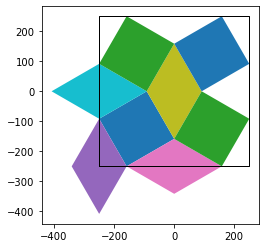

In [66]:
unit2 = TileUnit(spacing = spacing, crs = ak.crs)
unit2.elements = elements2
unit2.tile = tile

ax = unit2.elements.plot(column = "element_id")
unit2.tile.plot(ax = ax, edgecolor = "k", facecolor = "#00000000")

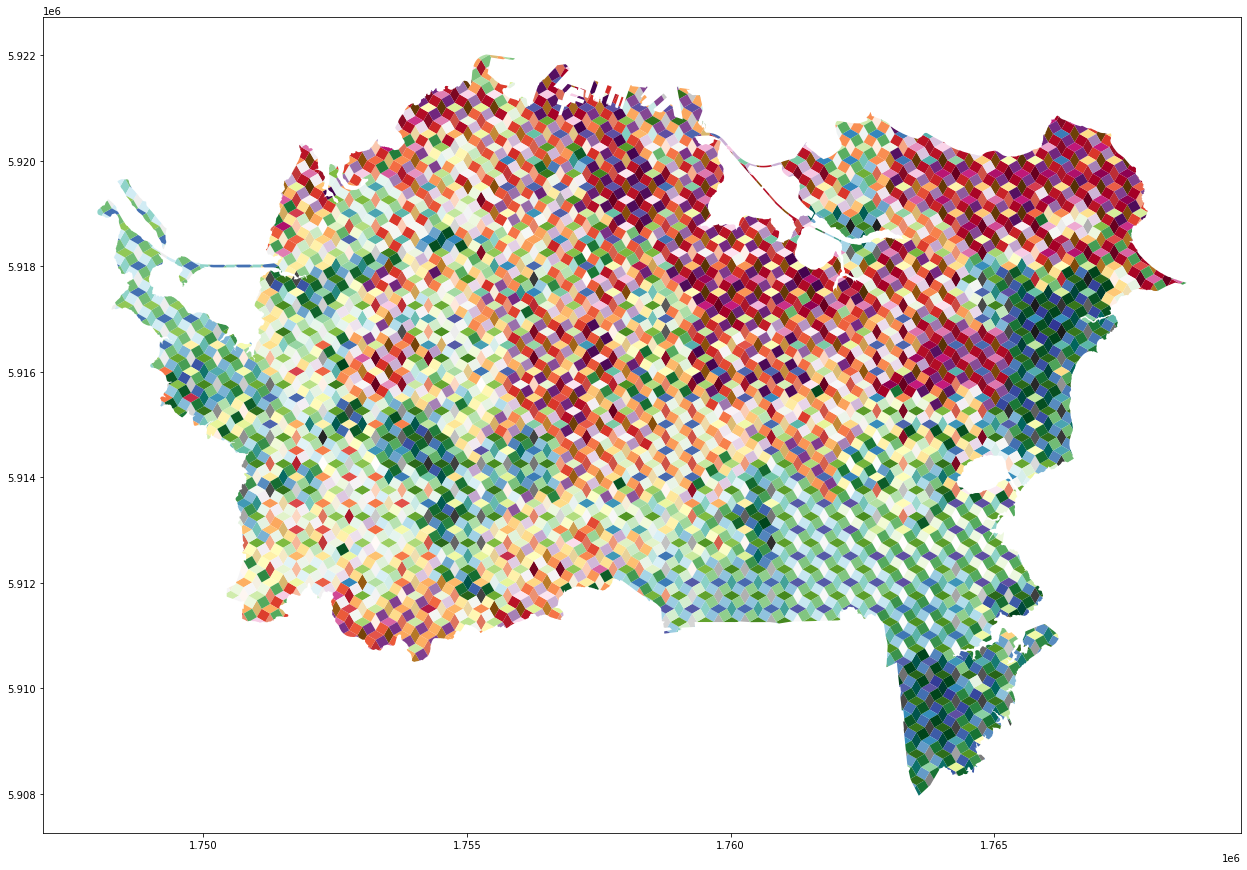

In [67]:
tiling2 = Tiling(unit2, ak, id_var = "DZ2018").get_tiled_map(
    prioritise_tiles = True
)

fig = pyplot.figure(figsize = (24, 15))
ax = fig.add_subplot(111)
# ak.plot(ax = ax, facecolor = "#009966", linewidth = 0)

strands = set(tiling2.element_id)
cols = [x for x in tiling2.columns if "Rank" in x]
cmaps = ("BrBG", "RdGy", "RdYlBu", "Spectral", "PiYG", "PRGn", "PuOr")

for strand, col, cmap in zip(strands, cols, cmaps):
    tiling2[tiling2.element_id == strand].plot(
        ax = ax, column = col, cmap = cmap, k = 100, 
        scheme = "equal_interval", linewidth = 0)